In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import matplotlib.pyplot as plt
import wordcloud;
import numpy as np ;

In [2]:
allQuestions=pd.read_csv('allquestions.csv', low_memory=False);
allQuestions

,id,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,view_count,tags,location,year
0,34274707,34281637.0,1,0,NaN,2015-12-14 19:06:23.133 UTC,2015-12-15 07:28:19.543 UTC,2015-12-15 07:28:19.543 UTC,NaN,484902.0,NaN,873601,NaN,1,1,256,salt-stack,"Pune, India",2015
1,34328255,34416491.0,1,0,NaN,2015-12-17 06:45:46.923 UTC,2016-02-05 06:10:15.163 UTC,NaN,NaN,NaN,NaN,24954,NaN,1,0,256,asp.net-mvc|mvc-mini-profiler,"Albuquerque, NM USA",2015
2,34363186,34403729.0,3,0,NaN,2015-12-18 20:08:39.82 UTC,2016-01-19 21:12:48.133 UTC,2016-01-19 21:12:48.133 UTC,NaN,3328802.0,NaN,3328802,NaN,1,2,256,python|python-2.7|os.walk,"Stanford, CA, United States",2015
3,34253259,NaN,3,0,NaN,2015-12-13 16:17:29.253 UTC,2015-12-13 16:58:08.53 UTC,NaN,NaN,NaN,NaN,4146780,NaN,1,0,512,android,"Ahmedabad, Gujarat, India",2015
4,34331867,NaN,1,0,NaN,2015-12-17 10:11:06.79 UTC,2016-01-31 11:03:05.943 UTC,2015-12-17 13:54:03.74 UTC,NaN,2427479.0,NaN,541786,NaN,1,0,512,ios|objective-c|iphone|uitableview,"Chandigarh, India",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006460,6615168,NaN,23,3,NaN,2011-07-07 18:11:05.233 UTC,2019-07-23 11:36:26.953 UTC,2016-05-24 18:07:35.653 UTC,NaN,2756409.0,NaN,523811,NaN,1,111,83296,amazon-s3|policy|bucket,"Boulder, CO, USA",2011
2006461,6330260,6330456.0,24,6,NaN,2011-06-13 12:13:44.77 UTC,2018-11-22 22:18:02.24 UTC,2016-09-13 06:50:57.73 UTC,NaN,1367344.0,NaN,463721,NaN,1,340,282728,java|android|android-activity|screen|flow,"Kolkata, India",2011
2006462,6382023,6382036.0,26,6,NaN,2011-06-17 06:15:50.66 UTC,2019-04-13 10:32:15.21 UTC,2018-12-28 13:22:20.817 UTC,NaN,107625.0,NaN,726212,NaN,1,730,1078833,html|css,United States,2011
2006463,6854127,6854182.0,30,2,NaN,2011-07-28 04:34:21 UTC,2019-03-27 09:18:10.557 UTC,2016-02-01 14:59:19.743 UTC,NaN,895245.0,NaN,20951,NaN,1,304,290482,android|android-logcat,"Bangalore, India",2011


In [3]:
allUsers=pd.read_csv('allusers.csv', low_memory=False);
allUsers

,id,display_name,creation_date,location,reputation,up_votes,down_votes,views
0,567576,drmirror,2011-01-07 22:52:23.133 UTC,"New York, United States",3230,167,1,172
1,575842,Sodino,2011-01-14 15:30:23.58 UTC,"D.C., DC, United States",146,18,1,21
2,593053,dsjoerg,2011-01-27 23:29:49.663 UTC,"New York, United States",563,75,5,118
3,612333,rodly,2011-02-11 00:51:08.667 UTC,"Ann Arbor, MI, United States",149,29,0,30
4,613697,Andy Cohen,2011-02-11 22:02:31.337 UTC,"Minneapolis, MN, United States",164,75,3,52
...,...,...,...,...,...,...,...,...
895927,8805668,vishalgada,2017-10-20 09:09:27.283 UTC,"Bangalore, Karnataka, India",41,1,0,14
895928,3408275,Anubhav,2014-03-11 22:47:58.417 UTC,"Bangalore, India",41,1,0,14
895929,6914996,user6914996,2016-10-03 10:03:18.503 UTC,"Delhi, India",41,1,0,14
895930,2105649,AndrewRota,2013-02-24 23:48:34.213 UTC,"Boston, MA, United States",41,3,0,14


In [4]:
pakUsers=allUsers[allUsers['location'].str.contains('Pakistan')]
pakUsers

,id,display_name,creation_date,location,reputation,up_votes,down_votes,views
24,840186,Saadi,2011-07-12 06:47:57.29 UTC,"Mardan, Pakistan",973,22,1,103
40,961136,Abid Hussain,2011-09-23 12:25:14.587 UTC,"Lahore, Pakistan",1366,51,4,213
52,1137199,dotNET,2012-01-08 15:10:15.58 UTC,"Islamabad, Pakistan",24395,4053,85,3679
55,1152014,Usman,2012-01-16 14:21:31.073 UTC,Pakistan,580,14,1,27
90,1346433,Akhtar,2012-04-20 11:42:54.067 UTC,"Lahore, Pakistan",2695,116,3,169
...,...,...,...,...,...,...,...,...
895843,11055910,Muhammad Naeem,2019-02-13 10:42:06.733 UTC,"Lahore, Pakistan",41,3,0,11
895848,2818279,GNChishti,2013-09-26 06:55:07.437 UTC,Pakistan,41,2,0,12
895889,10513552,AhmAr KAka,2018-10-16 14:31:42.057 UTC,"Islamabad, Pakistan",41,4,0,13
895913,1652417,PicSonics,2012-09-06 15:00:06.437 UTC,"Islamabad, Pakistan",41,1,0,14


In [5]:
pakQuestions=pd.merge(allQuestions,pakUsers,left_on='owner_user_id',right_on='id',how='inner')
pakQuestions

,id_x,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date_x,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,...,location_x,year,id_y,display_name,creation_date_y,location_y,reputation,up_votes,down_votes,views
0,34509853,34509951.0,3,0,NaN,2015-12-29 11:16:18.073 UTC,2015-12-29 13:51:36.46 UTC,NaN,NaN,NaN,...,"Lahore, Punjab, Pakistan",2015,3678308,Muhammad Waleed,2014-05-27 04:39:49.697 UTC,"Lahore, Punjab, Pakistan",2250,159,19,1563
1,34652565,34736630.0,1,0,NaN,2016-01-07 10:18:10.453 UTC,2016-01-12 06:06:11.503 UTC,NaN,NaN,NaN,...,"Lahore, Punjab, Pakistan",2016,3678308,Muhammad Waleed,2014-05-27 04:39:49.697 UTC,"Lahore, Punjab, Pakistan",2250,159,19,1563
2,34809991,NaN,1,0,NaN,2016-01-15 11:25:30.63 UTC,2016-01-26 07:10:27.413 UTC,2016-01-15 11:34:39.497 UTC,NaN,4562287.0,...,"Lahore, Punjab, Pakistan",2016,3678308,Muhammad Waleed,2014-05-27 04:39:49.697 UTC,"Lahore, Punjab, Pakistan",2250,159,19,1563
3,34787757,34788054.0,2,5,NaN,2016-01-14 10:53:46.303 UTC,2017-05-16 10:53:26.637 UTC,2016-01-14 10:56:49.363 UTC,NaN,2710476.0,...,"Lahore, Punjab, Pakistan",2016,3678308,Muhammad Waleed,2014-05-27 04:39:49.697 UTC,"Lahore, Punjab, Pakistan",2250,159,19,1563
4,40692035,40692930.0,2,0,NaN,2016-11-19 10:55:09.65 UTC,2016-11-19 15:16:10.027 UTC,NaN,NaN,NaN,...,"Lahore, Punjab, Pakistan",2016,3678308,Muhammad Waleed,2014-05-27 04:39:49.697 UTC,"Lahore, Punjab, Pakistan",2250,159,19,1563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86913,6382445,6382531.0,1,5,NaN,2011-06-17 07:03:57.793 UTC,2016-03-28 11:17:57.71 UTC,2016-03-28 11:17:57.71 UTC,NaN,3956566.0,...,"Lahore, Pakistan",2011,649813,Ehsank,2011-03-08 12:46:02.5 UTC,"Lahore, Pakistan",1,0,0,4
86914,6787485,NaN,2,2,NaN,2011-07-22 08:32:10.63 UTC,2015-07-15 13:10:25.967 UTC,2011-07-22 10:54:46.803 UTC,NaN,827754.0,...,Pakistan,2011,857544,ertjain,2011-07-22 08:32:10.63 UTC,Pakistan,1,0,0,4
86915,6605930,6620212.0,2,0,NaN,2011-07-07 04:46:30.123 UTC,2012-03-13 05:22:34.107 UTC,NaN,NaN,NaN,...,Pakistan,2011,606413,Omar Rehman,2011-02-07 12:26:10.083 UTC,Pakistan,1986,362,6,202
86916,6717172,NaN,3,2,NaN,2011-07-16 11:56:01.74 UTC,2011-07-18 04:59:43.137 UTC,2011-07-16 13:16:35.337 UTC,NaN,847724.0,...,"Shah Faisalabad, Pakistan",2011,847724,sohail,2011-07-16 11:56:01.74 UTC,"Shah Faisalabad, Pakistan",1,0,0,1


In [6]:
indiaUsers=allUsers[allUsers['location'].str.contains('India')]
indiaUsers


,id,display_name,creation_date,location,reputation,up_votes,down_votes,views
7,676300,Rajeev,2011-03-25 07:41:35.313 UTC,"Hyderabad, India",136,47,0,94
8,677745,abnvp,2011-03-26 05:16:45.743 UTC,"Hyderabad, India",1007,91,3,136
10,694240,M.A.Murali,2011-04-06 05:49:49.383 UTC,"Madurai, India",8158,29,0,1457
11,706105,Rushikesh,2011-04-13 13:10:33.203 UTC,"Pune, India",531,0,0,192
12,710706,Thangamani J,2011-04-16 00:14:50.39 UTC,"Chennai, India",25,0,0,22
...,...,...,...,...,...,...,...,...
895924,5164420,Rahul Sen,2015-07-28 10:25:58.993 UTC,"Bhubaneswar, Odisha, India",41,6,0,14
895925,7420375,Vinay Kumar,2017-01-15 03:12:14.06 UTC,"Hyderabad, Telangana, India",41,0,0,14
895927,8805668,vishalgada,2017-10-20 09:09:27.283 UTC,"Bangalore, Karnataka, India",41,1,0,14
895928,3408275,Anubhav,2014-03-11 22:47:58.417 UTC,"Bangalore, India",41,1,0,14


In [53]:
indiaQuestions=pd.merge(allQuestions,indiaUsers,left_on='owner_user_id',right_on='id',how='inner')
indiaQuestions

,id_x,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date_x,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,...,location_x,year,id_y,display_name,creation_date_y,location_y,reputation,up_votes,down_votes,views
0,34274707,34281637.0,1,0,NaN,2015-12-14 19:06:23.133 UTC,2015-12-15 07:28:19.543 UTC,2015-12-15 07:28:19.543 UTC,NaN,484902.0,...,"Pune, India",2015,873601,Vishal Biyani,2011-08-01 23:06:58.667 UTC,"Pune, India",3424,474,31,970
1,34288904,34310458.0,1,0,NaN,2015-12-15 12:09:12.317 UTC,2015-12-16 11:09:48.057 UTC,NaN,NaN,NaN,...,"Pune, India",2015,873601,Vishal Biyani,2011-08-01 23:06:58.667 UTC,"Pune, India",3424,474,31,970
2,11783763,11784668.0,1,0,NaN,2012-08-02 18:40:22.383 UTC,2012-08-02 19:43:47.237 UTC,NaN,NaN,NaN,...,"Pune, India",2012,873601,Vishal Biyani,2011-08-01 23:06:58.667 UTC,"Pune, India",3424,474,31,970
3,19313013,NaN,1,0,NaN,2013-10-11 07:52:49.777 UTC,2013-10-11 07:52:49.777 UTC,NaN,NaN,NaN,...,"Pune, India",2013,873601,Vishal Biyani,2011-08-01 23:06:58.667 UTC,"Pune, India",3424,474,31,970
4,30285988,30286598.0,1,1,NaN,2015-05-17 10:40:49.04 UTC,2015-05-17 11:44:09.603 UTC,NaN,NaN,NaN,...,"Pune, India",2015,873601,Vishal Biyani,2011-08-01 23:06:58.667 UTC,"Pune, India",3424,474,31,970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941229,6327180,NaN,3,0,NaN,2011-06-13 06:13:39.313 UTC,2011-06-13 08:42:18.987 UTC,2011-06-13 08:42:18.987 UTC,NaN,795463.0,...,"Jaipur, India",2011,795463,Master,2011-06-13 06:08:21.653 UTC,"Jaipur, India",1,0,0,0
941230,6624350,NaN,4,2,NaN,2011-07-08 12:23:44.327 UTC,2012-07-08 20:18:54.29 UTC,NaN,NaN,NaN,...,India,2011,833551,user833551,2011-07-07 12:55:48.783 UTC,India,21,0,0,91
941231,6694797,NaN,4,8,NaN,2011-07-14 14:25:43.767 UTC,2011-07-15 18:27:20.813 UTC,2011-07-15 14:54:54.897 UTC,NaN,125389.0,...,"Bangalore, India",2011,844737,manjiler,2011-07-14 14:09:28.493 UTC,"Bangalore, India",31,0,0,6
941232,6476346,6502969.0,4,5,NaN,2011-06-25 06:52:14.52 UTC,2017-02-24 12:49:58.927 UTC,2011-06-25 07:05:29.25 UTC,NaN,785872.0,...,"Chennai, India",2011,785872,aruun.kumaar,2011-06-06 12:18:19.297 UTC,"Chennai, India",1,0,0,9


In [8]:
usaUsers=allUsers[allUsers['location'].str.contains('USA')|allUsers['location'].str.contains('United States')]
usaUsers

,id,display_name,creation_date,location,reputation,up_votes,down_votes,views
0,567576,drmirror,2011-01-07 22:52:23.133 UTC,"New York, United States",3230,167,1,172
1,575842,Sodino,2011-01-14 15:30:23.58 UTC,"D.C., DC, United States",146,18,1,21
2,593053,dsjoerg,2011-01-27 23:29:49.663 UTC,"New York, United States",563,75,5,118
3,612333,rodly,2011-02-11 00:51:08.667 UTC,"Ann Arbor, MI, United States",149,29,0,30
4,613697,Andy Cohen,2011-02-11 22:02:31.337 UTC,"Minneapolis, MN, United States",164,75,3,52
...,...,...,...,...,...,...,...,...
895916,7583721,Frank_Cerny,2017-02-18 02:59:34.513 UTC,"Columbus, OH, United States",41,2,0,14
895918,1773443,benley,2012-10-25 07:36:51.123 UTC,"Boston, MA, United States",41,0,0,14
895926,7536717,Bill Johnson,2017-02-08 20:25:58.62 UTC,"Houston, TX, United States",41,0,0,14
895930,2105649,AndrewRota,2013-02-24 23:48:34.213 UTC,"Boston, MA, United States",41,3,0,14


In [9]:
usaQuestions=pd.merge(allQuestions,usaUsers,left_on='owner_user_id',right_on='id',how='inner')
usaQuestions

,id_x,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date_x,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,...,location_x,year,id_y,display_name,creation_date_y,location_y,reputation,up_votes,down_votes,views
0,34363186,34403729.0,3,0,NaN,2015-12-18 20:08:39.82 UTC,2016-01-19 21:12:48.133 UTC,2016-01-19 21:12:48.133 UTC,NaN,3328802.0,...,"Stanford, CA, United States",2015,3328802,learnningprogramming,2014-02-19 15:33:16.7 UTC,"Stanford, CA, United States",301,67,0,107
1,34664568,NaN,3,0,NaN,2016-01-07 20:30:10.76 UTC,2016-01-07 21:51:41.68 UTC,NaN,NaN,NaN,...,"Stanford, CA, United States",2016,3328802,learnningprogramming,2014-02-19 15:33:16.7 UTC,"Stanford, CA, United States",301,67,0,107
2,34641694,34641855.0,2,1,NaN,2016-01-06 19:59:22.66 UTC,2016-01-06 20:28:02.767 UTC,NaN,NaN,NaN,...,"Stanford, CA, United States",2016,3328802,learnningprogramming,2014-02-19 15:33:16.7 UTC,"Stanford, CA, United States",301,67,0,107
3,34685371,NaN,0,2,NaN,2016-01-08 20:17:34.397 UTC,2016-01-08 22:05:38.247 UTC,2016-01-08 22:05:38.247 UTC,NaN,2144390.0,...,"Stanford, CA, United States",2016,3328802,learnningprogramming,2014-02-19 15:33:16.7 UTC,"Stanford, CA, United States",301,67,0,107
4,34619808,34620053.0,2,2,NaN,2016-01-05 19:32:21.437 UTC,2016-01-05 19:51:25.377 UTC,2016-01-05 19:51:25.377 UTC,NaN,30105.0,...,"Stanford, CA, United States",2016,3328802,learnningprogramming,2014-02-19 15:33:16.7 UTC,"Stanford, CA, United States",301,67,0,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724959,6974693,6984947.0,5,2,NaN,2011-08-07 18:07:47.423 UTC,2011-08-08 16:24:41.283 UTC,2011-08-08 16:24:41.283 UTC,NaN,882981.0,...,"New York, United States",2011,882981,larson,2011-08-07 17:34:08.423 UTC,"New York, United States",23,0,0,6
724960,6434125,NaN,5,3,NaN,2011-06-22 02:05:07.25 UTC,2011-06-22 03:29:46.547 UTC,NaN,NaN,NaN,...,"Montclair, NJ, USA",2011,809511,ChrisW,2011-06-22 01:29:46.52 UTC,"Montclair, NJ, USA",41,17,0,3
724961,6878362,6884694.0,6,1,NaN,2011-07-29 19:57:15.043 UTC,2012-04-01 21:53:27.52 UTC,2011-07-29 21:16:03.757 UTC,NaN,765277.0,...,"Atlanta, GA, United States",2011,765277,l3thal,2011-05-23 00:46:40.277 UTC,"Atlanta, GA, United States",522,1,1,33
724962,6722356,NaN,6,0,NaN,2011-07-17 06:40:45.207 UTC,2012-02-11 01:21:56.323 UTC,NaN,NaN,NaN,...,"San Francisco, CA, USA",2011,848430,ganz,2011-07-17 06:21:29.687 UTC,"San Francisco, CA, USA",331,0,0,20


In [28]:
pakProb=(len(pakQuestions.index)/len(allQuestions.index))*100
indiaProb=(len(indiaQuestions.index)/len(allQuestions.index))*100
usaProb=(len(usaQuestions.index)/len(allQuestions.index))*100

df = pd.DataFrame({'Country': ['Pakistan','USA','India'], 'Percentage': [pakProb,usaProb,indiaProb]})
df

,Country,Percentage
0,Pakistan,4.331897
1,USA,36.131405
2,India,46.910063


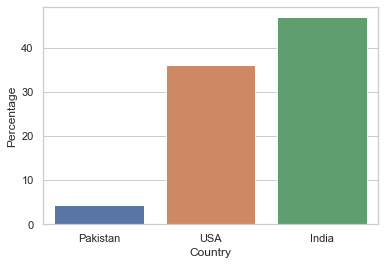

In [29]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Country", y="Percentage", data=df)